<a href="https://colab.research.google.com/github/joel-codeing/code-clause/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [22]:
# Load your dataset
data = pd.read_csv('/content/customer_data_new.csv')

In [23]:
# Define weights for each feature (you can adjust these based on business insights)
weight_num_purchases = 0.7
weight_total_purchase_amount = 0.5
weight_age = 0.3

In [24]:
# Calculate lifetime value based on weighted combination of features
data['lifetime_value'] = (data['num_purchases'] * weight_num_purchases) + \
                         (data['total_purchase_amount'] * weight_total_purchase_amount) + \
                         (data['age'] * weight_age)

In [25]:
# Select features and target variable
X = data[['num_purchases', 'total_purchase_amount', 'age']]
y = data['lifetime_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform features to polynomial features
poly = PolynomialFeatures(degree=2)  # You can adjust the degree of polynomial
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize and train a polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict LTV for test set
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.483871569337093e-21


In [26]:
# Add predicted lifetime value to the test set
X_test['predicted_lifetime_value'] = y_pred

# Save the DataFrame with predicted values to a CSV file
X_test.to_csv('predicted_lifetime_value.csv', index=False)

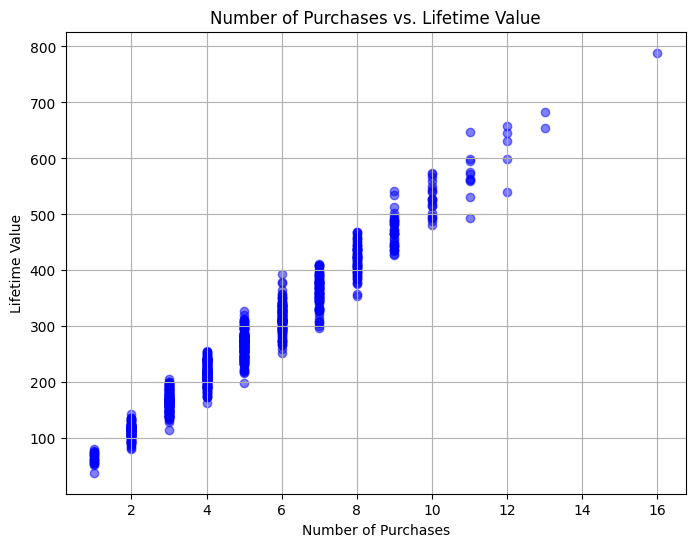

In [27]:
import matplotlib.pyplot as plt

# Scatter plot of num_purchases vs. lifetime_value
plt.figure(figsize=(8, 6))
plt.scatter(data['num_purchases'], data['lifetime_value'], color='blue', alpha=0.5)
plt.title('Number of Purchases vs. Lifetime Value')
plt.xlabel('Number of Purchases')
plt.ylabel('Lifetime Value')
plt.grid(True)
plt.show()

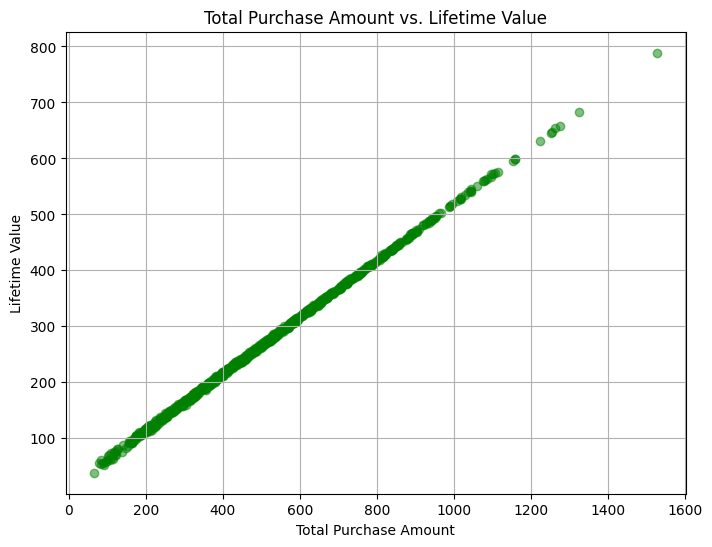

In [28]:
# Scatter plot of total_purchase_amount vs. lifetime_value
plt.figure(figsize=(8, 6))
plt.scatter(data['total_purchase_amount'], data['lifetime_value'], color='green', alpha=0.5)
plt.title('Total Purchase Amount vs. Lifetime Value')
plt.xlabel('Total Purchase Amount')
plt.ylabel('Lifetime Value')
plt.grid(True)
plt.show()

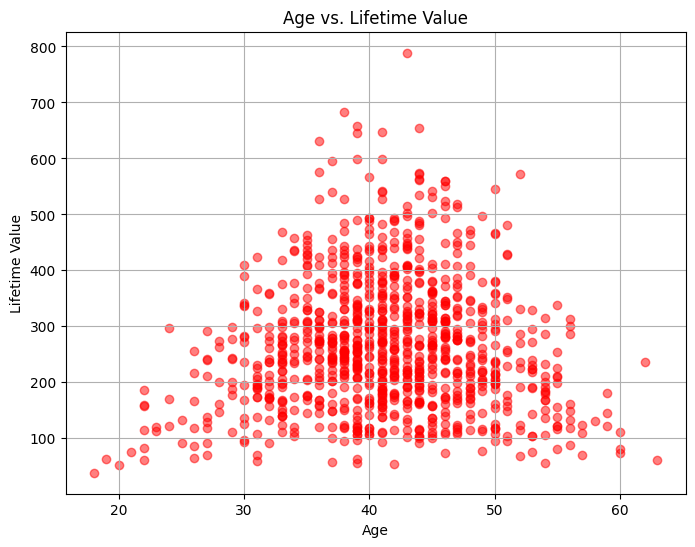

In [29]:
# Scatter plot of age vs. lifetime_value
plt.figure(figsize=(8, 6))
plt.scatter(data['age'], data['lifetime_value'], color='red', alpha=0.5)
plt.title('Age vs. Lifetime Value')
plt.xlabel('Age')
plt.ylabel('Lifetime Value')
plt.grid(True)
plt.show()